<a href="https://colab.research.google.com/github/Ernesto16/AI-Saturdays/blob/master/Free%20Text%20%26%20NLP/Week_5_Assessment_Free_Text_%26_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scraping Data**

Using the Fantasy football data scraped during our data collection in week 2

In [1]:
# Let's firstly install all libraries we'll need for this assessment
!pip install numpy
!pip install scipy
!pip -q install PyMuPDF
!pip install nltk
!pip install scikit-learn
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3

In [1]:
import requests
import fitz
import re

In [2]:
url = "https://fantasy.premierleague.com/"
response = requests.get(url)

# Checking the response status code
print('Response Status Code: ', response.status_code)

# Print the first 200 characters of the response content
print('Response Content:')
print(response.text[:200])

Response Status Code:  200
Response Content:
<!DOCTYPE html>

<html lang="en">
    <head>
        <!-- OneTrust Cookies Consent Notice start for premierleague.com -->
        <script
            charset="UTF-8"
            data-domain-script="cd


In [3]:
import requests

# FPL API endpoint
url = "https://fantasy.premierleague.com/api/bootstrap-static/"
response = requests.get(url).json()
elements = response["elements"]

# Collect texts: name + news
texts = []
for el in elements:
    name = f"{el['first_name']} {el['second_name']}"
    news = el.get("news", "").strip()
    if news:  # only include players with news text
        texts.append(f"{name}: {news}")

# Print first 15 examples
for t in texts[:15]:
    print(t)

Karl Hein: Has joined Werder Bremen on loan for the rest of the season.
William Saliba: Ankle injury - 75% chance of playing
Benjamin White: Knock - 50% chance of playing
Bukayo Saka: Hamstring injury - Unknown return date
Christian Nørgaard: Knock - 50% chance of playing
Kai Havertz: Knee injury - Unknown return date
Gabriel Fernando de Jesus: Knee injury - Unknown return date
Joe Gauci: Has joined Port Vale on loan for the rest of the season.
Filip Marschall: Has joined Stevenage permanently.
Andrés García: Knock - 25% chance of playing
Álex Moreno Lopera: Has joined Girona permanently.
Leon Bailey: Has joined AS Roma on loan for the rest of the season.
Ross Barkley: Knock - 25% chance of playing
Enzo Barrenechea: Season-long loan to Benfica
Lewis Dobbin: Has joined Preston North End on loan for the rest of the season.


# Cleaning the Texts

Taking care of upper case letters, whitespaces and removing any non-aphabetical characters

In [4]:
clean_texts = [re.sub(r'[^a-zA-Z\s]', '', t.lower()) for t in texts]
print(clean_texts[:5])

['karl hein has joined werder bremen on loan for the rest of the season', 'william saliba ankle injury   chance of playing', 'benjamin white knock   chance of playing', 'bukayo saka hamstring injury  unknown return date', 'christian nrgaard knock   chance of playing']


In [12]:
texts[:20]

['Karl Hein: Has joined Werder Bremen on loan for the rest of the season.',
 'William Saliba: Ankle injury - 75% chance of playing',
 'Benjamin White: Knock - 50% chance of playing',
 'Bukayo Saka: Hamstring injury - Unknown return date',
 'Christian Nørgaard: Knock - 50% chance of playing',
 'Kai Havertz: Knee injury - Unknown return date',
 'Gabriel Fernando de Jesus: Knee injury - Unknown return date',
 'Joe Gauci: Has joined Port Vale on loan for the rest of the season.',
 'Filip Marschall: Has joined Stevenage permanently.',
 'Andrés García: Knock - 25% chance of playing',
 'Álex Moreno Lopera: Has joined Girona permanently.',
 'Leon Bailey: Has joined AS Roma on loan for the rest of the season.',
 'Ross Barkley: Knock - 25% chance of playing',
 'Enzo Barrenechea: Season-long loan to Benfica',
 'Lewis Dobbin: Has joined Preston North End on loan for the rest of the season.',
 'Boubacar Kamara: Hamstring injury - 50% chance of playing',
 'Amadou Onana: Hamstring injury - 50% chance

# Word Tokenization (NLTK)

In [14]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

word_tokens = [word_tokenize(t) for t in clean_texts]
print(word_tokens[:3])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[['karl', 'hein', 'has', 'joined', 'werder', 'bremen', 'on', 'loan', 'for', 'the', 'rest', 'of', 'the', 'season'], ['william', 'saliba', 'ankle', 'injury', 'chance', 'of', 'playing'], ['benjamin', 'white', 'knock', 'chance', 'of', 'playing']]


# Character Tokenization

In [15]:
char_tokens = [list(t.replace(" ", "")) for t in clean_texts]
print(char_tokens[0][:30])  # first 30 chars of first text

['k', 'a', 'r', 'l', 'h', 'e', 'i', 'n', 'h', 'a', 's', 'j', 'o', 'i', 'n', 'e', 'd', 'w', 'e', 'r', 'd', 'e', 'r', 'b', 'r', 'e', 'm', 'e', 'n', 'o']


# Subword Tokenization (using regex split & ngrams)

In [16]:
subword_tokens = [re.findall(r'\w{2,}', t) for t in clean_texts]
print(subword_tokens[:3])

[['karl', 'hein', 'has', 'joined', 'werder', 'bremen', 'on', 'loan', 'for', 'the', 'rest', 'of', 'the', 'season'], ['william', 'saliba', 'ankle', 'injury', 'chance', 'of', 'playing'], ['benjamin', 'white', 'knock', 'chance', 'of', 'playing']]


In [26]:
from nltk.util import ngrams

subwords = list(ngrams(clean_texts[0].split(), 2))  # bigrams
print(subwords[:10])

[('karl', 'hein'), ('hein', 'has'), ('has', 'joined'), ('joined', 'werder'), ('werder', 'bremen'), ('bremen', 'on'), ('on', 'loan'), ('loan', 'for'), ('for', 'the'), ('the', 'rest')]


# Character Level Histogram

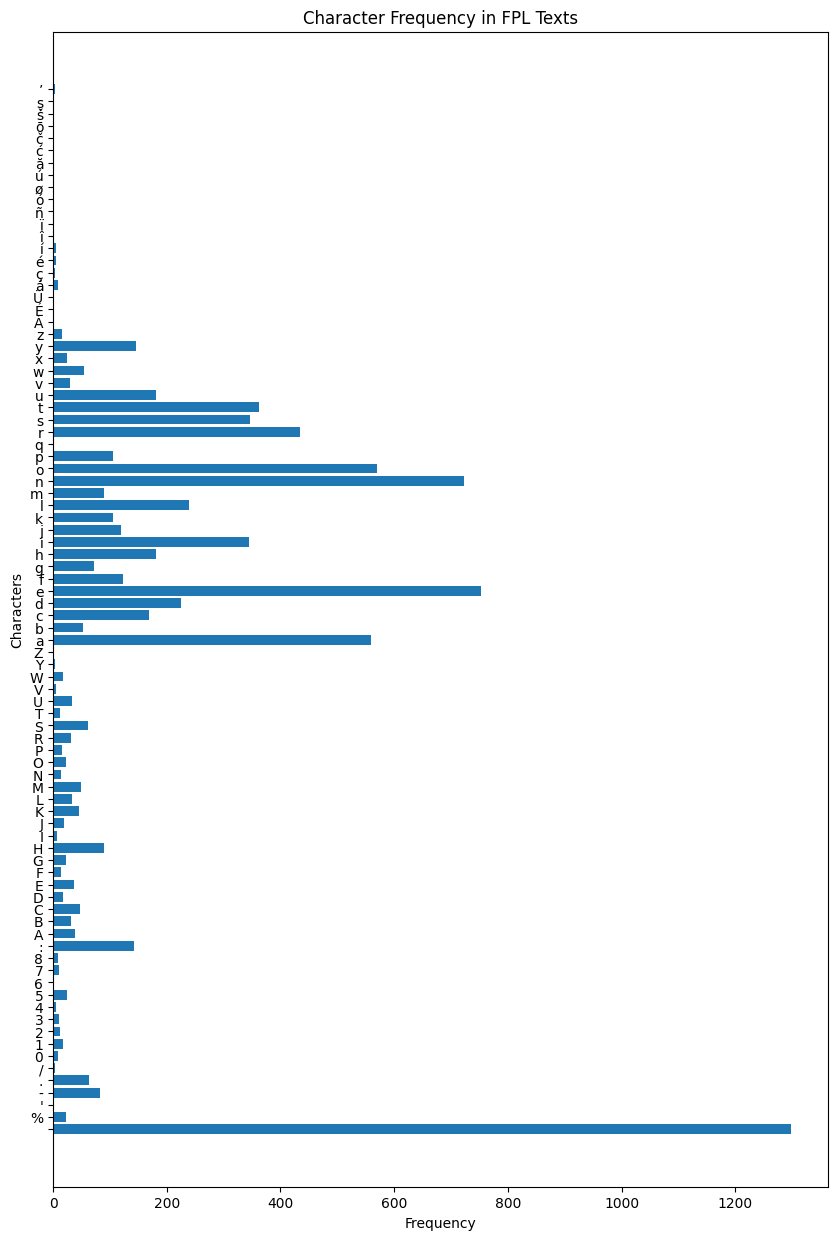

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Join all texts together
separate_characters = list(''.join(texts))

# Count frequency of characters
character_frequency = np.unique(separate_characters, return_counts=True)

plt.figure(figsize=(10, 15))
plt.barh(character_frequency[0], character_frequency[1])
plt.title("Character Frequency in FPL Texts")
plt.xlabel("Frequency")
plt.ylabel("Characters")
plt.show()

# Word Level Histogram

Most frequent word: the


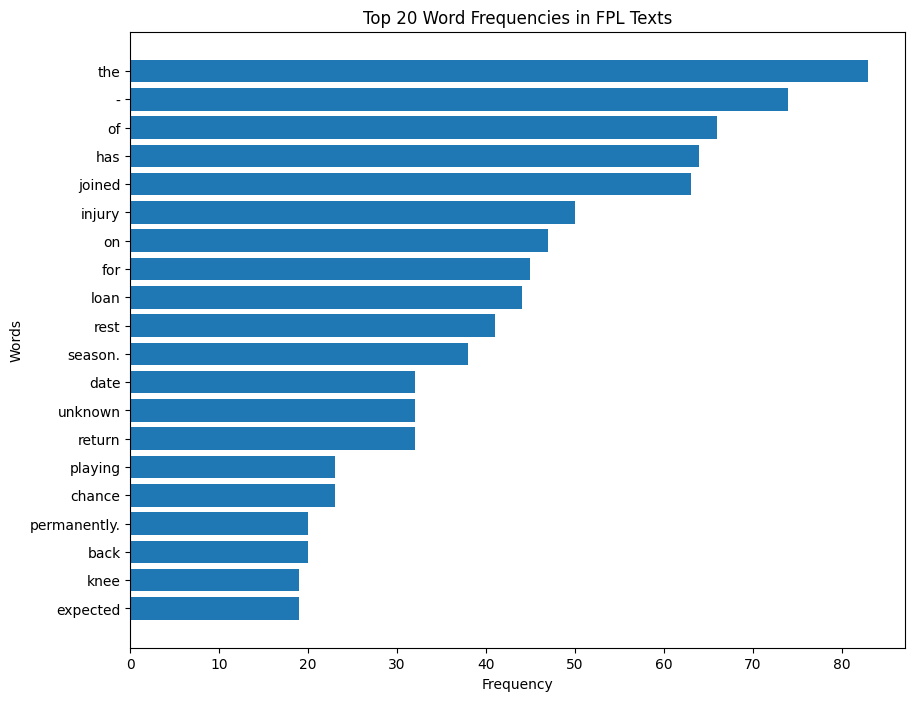

In [18]:
# Join texts and split into words
all_words = ' '.join(texts).lower().split()

# Count frequency of words
word_frequency = np.unique(all_words, return_counts=True)

# Show the most frequent word
print("Most frequent word:", word_frequency[0][word_frequency[1].argmax()])

# Plot top 20 words
top_n = 20
sorted_idx = np.argsort(word_frequency[1])[-top_n:]

plt.figure(figsize=(10, 8))
plt.barh(word_frequency[0][sorted_idx], word_frequency[1][sorted_idx])
plt.title("Top 20 Word Frequencies in FPL Texts")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


# Word Cloud

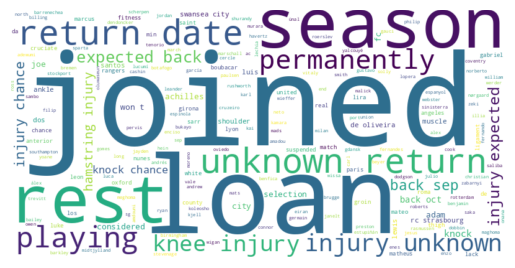

In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_texts)

print("TF-IDF shape:", X.shape)
print(vectorizer.get_feature_names_out()[:20])

TF-IDF shape: (143, 438)
['ac' 'achilles' 'adam' 'adewumi' 'agent' 'aji' 'albion' 'alese' 'alex'
 'alexander' 'alhilal' 'alverca' 'amadou' 'amdouni' 'ampadu' 'andrade'
 'andrew' 'andrs' 'angeles' 'ankle']


# Word Similarity (Cosine similarity on TF-IDF)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(clean_texts)

# Compare similarity between two player news texts
sample_idx_1 = 5
sample_idx_2 = 6
similarity = cosine_similarity(tfidf_vectors[sample_idx_1], tfidf_vectors[sample_idx_2])
print(f"Cosine similarity between sample {sample_idx_1} and {sample_idx_2}: {similarity[0][0]:.3f}")

Cosine similarity between sample 5 and 6: 0.297


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X[:10])  # first 10 samples
print(similarity_matrix)

[[1.         0.0251959  0.02794394 0.         0.02726033 0.
  0.         0.33092601 0.05124022 0.02726033]
 [0.0251959  1.         0.2093431  0.04377361 0.20422175 0.04459558
  0.03674199 0.0259018  0.         0.20422175]
 [0.02794394 0.2093431  1.         0.         0.354594   0.
  0.         0.02872684 0.         0.354594  ]
 [0.         0.04377361 0.         1.         0.         0.25380457
  0.20910784 0.         0.         0.        ]
 [0.02726033 0.20422175 0.354594   0.         1.         0.
  0.         0.02802407 0.         0.34591926]
 [0.         0.04459558 0.         0.25380457 0.         1.
  0.2967631  0.         0.         0.        ]
 [0.         0.03674199 0.         0.20910784 0.         0.2967631
  1.         0.         0.         0.        ]
 [0.33092601 0.0259018  0.02872684 0.         0.02802407 0.
  0.         1.         0.0526758  0.02802407]
 [0.05124022 0.         0.         0.         0.         0.
  0.         0.0526758  1.         0.        ]
 [0.02726033 0

# Visualizing the embedding

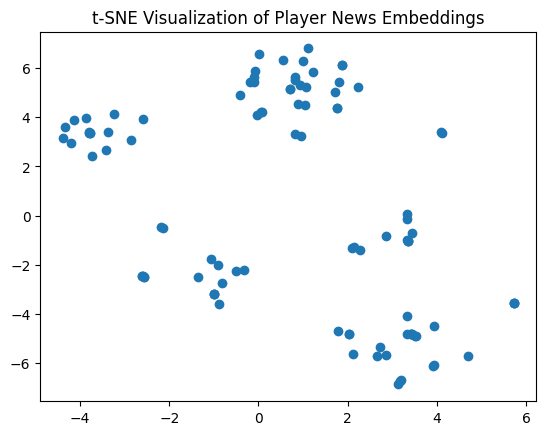

In [22]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X[:100].toarray())
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.title("t-SNE Visualization of Player News Embeddings")
plt.show()

In [34]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


# Split into sentences and then words
tokenized_words = [word_tokenize(sentence.lower()) for sentence in clean_texts]

# Now train Word2Vec
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_words, vector_size=100, window=5, min_count=1, workers=4)
model.save("fpl_word2vec.bin")


Model trained successfully!


In [35]:
model.wv.most_similar("injury", topn=5)

[('playing', 0.3020714819431305),
 ('takai', 0.30049169063568115),
 ('has', 0.3001578748226166),
 ('wigan', 0.27470847964286804),
 ('be', 0.26830190420150757)]

In [36]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_words, vector_size=100, window=5, min_count=1, workers=4)
model.save("fpl_word2vec.bin")

# Example: Similarity between "injury" and "return"
print(model.wv.similarity("injury", "return"))

0.12986465


# t-SNE Visualization of Embeddings

In [ ]:
# from sklearn.manifold import TSNE
# import numpy as np

# # Select some words to visualize
# selected_words = ["injury", "return", "doubt", "training", "available"]
# word_embeddings = np.array([model.wv[word] for word in selected_words if word in model.wv])

# tsne = TSNE(n_components=2, random_state=42, perplexity=3)
# word_2d = tsne.fit_transform(word_embeddings)

# plt.figure(figsize=(8, 8))
# for i, word in enumerate(selected_words):
#     if word in model.wv:
#         plt.scatter(word_2d[i, 0], word_2d[i, 1], marker="+", color="red")
#         plt.text(word_2d[i, 0]+0.2, word_2d[i, 1], word, fontsize=9)
# plt.title("t-SNE Visualization of Word Embeddings")
# plt.show()

# Pre-trained Embeddings

In [46]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=clean_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("my_word2vec_model.bin")